In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
# import matplotlib
# matplotlib.use('qtagg')
import matplotlib.pyplot as plt
# plt.ion()
from pytrans.analysis.analytic_traps import HarmonicTrap
from pytrans.ions import Ca40
from pytrans.plotting import plotting as pp

from pytrans.analysis import analyse_potential
from pytrans.plotting import plotting as pp

from models.surface_trap import SurfaceTrap
from pathlib import Path

_dir = Path('.').resolve() / 'data'



## SurfaceTrap

C:\Users\carmelo\eth\projects\pytrans-examples\deps\rectset\src\rectset\rectangle_electrode.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  return (ArcTan(((-x + x1)*(-y + y1))/(z*Sqrt((-x + x1)**2 + (-y + y1)**2 + z**2))) - ArcTan(((-x + x2)*(-y + y1))/(z*Sqrt((-x + x2)**2 + (-y + y1)**2 + z**2))) - ArcTan(((-x + x1)*(-y + y2))/(z*Sqrt((-x + x1)**2 + (-y + y2)**2 + z**2))) + ArcTan(((-x + x2)*(-y + y2))/(z*Sqrt((-x + x2)**2 + (-y + y2)**2 + z**2))))/(2.*Pi)


--------------
Trap potential analysis for ion Average[Ca40, Ca40]: 
Equilibrium position [um]
[-100.0019    0.0025   67.0826]
Gradient [V/m]
[-0.0178  1.6108  0.4919]
Displacement at 1 MHz [um]
[-0.0011  0.0985  0.0301]
Hessian [V/m2]
[[1.6351e+07 7.2766e+05 5.5891e+05]
 [7.2766e+05 6.2878e+08 7.9922e+07]
 [5.5891e+05 7.9922e+07 5.6371e+08]]
Normal mode frequencies [MHz]
[0.999957 5.58456 6.4608]
Eigenvectors
[[1 -0.00108 -0.000864]
 [-0.000117 0.558 -0.83]
 [0.00137 0.83 0.558]]
Tilt angle of mode 2 (6.46): 33.93°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40]: 
Equilibrium positions [um]
[[-102.8111    0.0035   67.0835]
 [ -97.2049   -0.0025   67.0787]]
Normal modes
  Freq [MHz]                   Ca40                                Ca40
------------  ----------  ---------  ----------  ----------  ----------  ---------
      0.9994   0.709      -0.001034  -0.000102    0.7052     -0.0004893  -0.001116
      1.731   -0.7052      0.001038   8.461e-05   0.709      -0.00

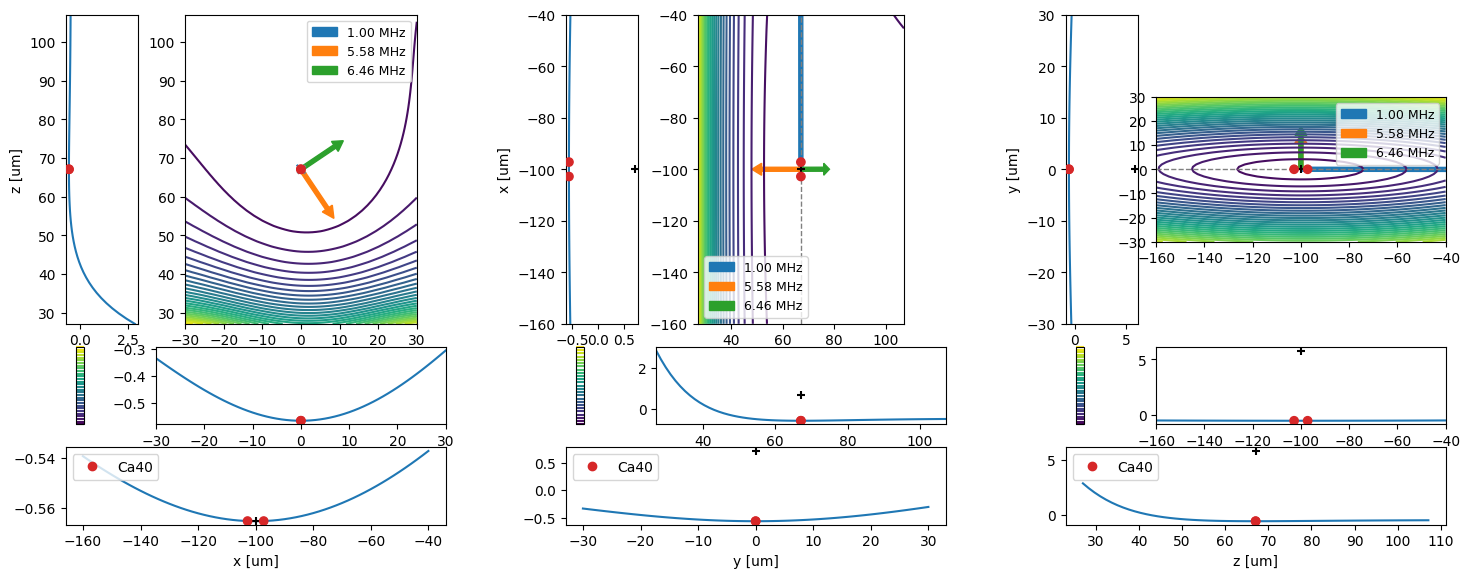

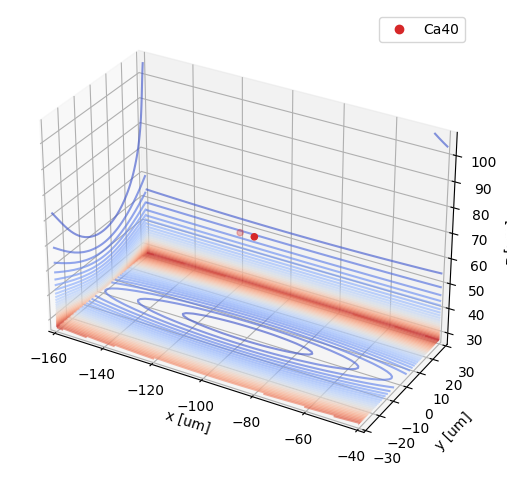

In [3]:
trap = SurfaceTrap()
voltages = np.load(_dir / 'waveform_transport.npy')[0]


r0 = [trap.x_ele(2), 0, trap.z0]
roi = (60e-6, 30e-6, 40e-6)
res = analyse_potential(trap, voltages, ions=[Ca40] * 2, r0=r0, verbose=False, roi=roi, plot=False)
# res
_plot_kw = dict(voltages=voltages, ion=Ca40, r0=r0, roi=roi, pseudo=True, analyse_results=res)

fig, axes = pp.plot_potential_make_layout(n=3)
for j, x in enumerate('xyz'):
    pp.plot_potential(trap, trap_axis=x, axes=axes[j], **_plot_kw)

fig, ax = pp.plot3d_potential(trap, **_plot_kw)
res

## HarmonicTrap

--------------
Trap potential analysis for ion Average[Ca40, Ca40, Ca40, Ca40]: 
Equilibrium position [um]
[0.0198 0.0039 0.004 ]
Gradient [V/m]
[ 0.2046  0.1443 -0.011 ]
Displacement at 1 MHz [um]
[ 0.0125  0.0088 -0.0007]
Hessian [V/m2]
[[ 1.6351e+07  0.0000e+00 -3.0000e+07]
 [ 0.0000e+00  3.6790e+07  0.0000e+00]
 [-3.0000e+07  0.0000e+00  1.4716e+08]]
Normal mode frequencies [MHz]
[0.774143 1.5 3.06606]
Eigenvectors
[[-0.977 0 -0.213]
 [0 1 0]
 [-0.213 0 0.977]]
Tilt angle of mode 2 (3.07): 90.00°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40, Ca40, Ca40]: 
Equilibrium positions [um]
[[-6.9404 -0.4079 -1.516 ]
 [-1.9332  1.4656 -0.4223]
 [ 1.9332 -1.4656  0.4224]
 [ 6.9406  0.408   1.5158]]
Normal modes
  Freq [MHz]                    Ca40                               Ca40                                Ca40                                Ca40
------------  ----------  ----------  ----------  ---------  ----------  ----------  ----------  ----------  ----------  -

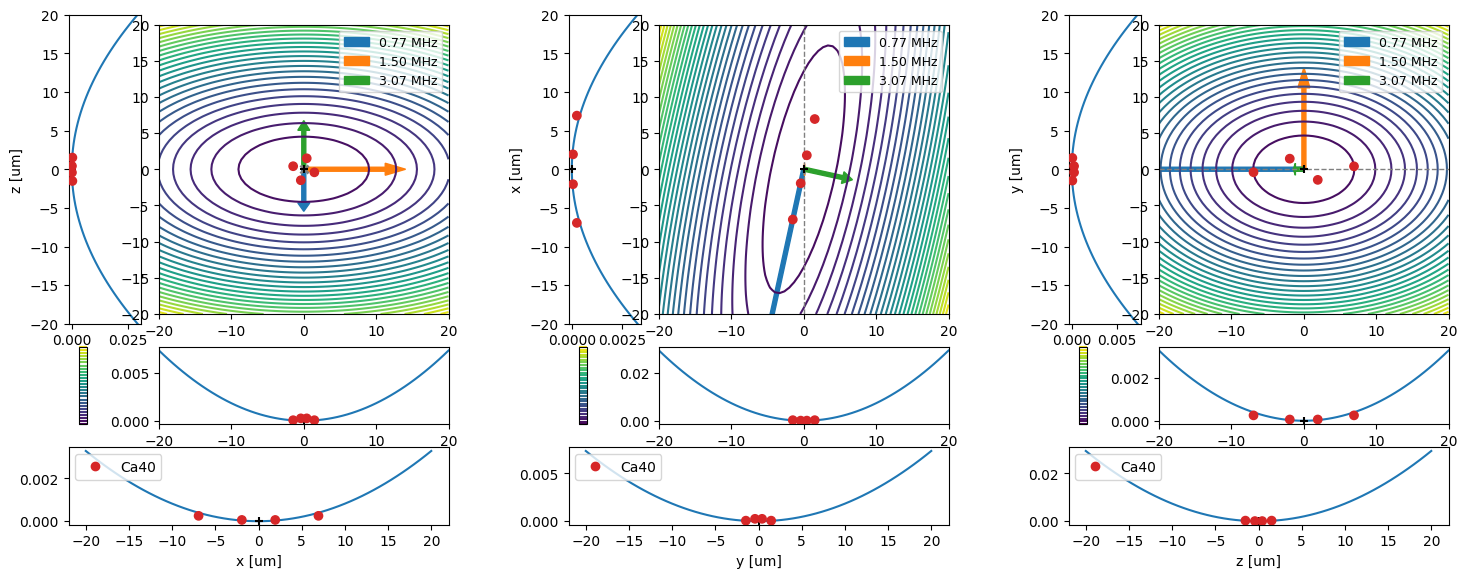

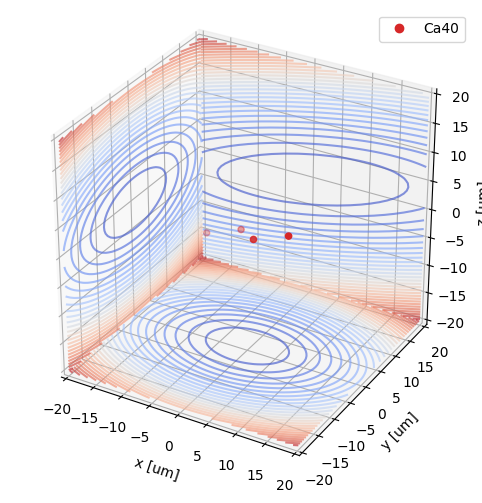

In [4]:
htrap = HarmonicTrap(fx=1e6, fy=1.5e6, fz=3e6, ion=Ca40, field=[0, 0, 0], tilt_xz=-3e7)

r0 = (0, 0, 0)
roi = (20e-6, 20e-6, 20e-6)
res = analyse_potential(htrap, None, ions=[Ca40] * 4, r0=r0, verbose=False, roi=roi, plot=False)
# res
_plot_kw = dict(voltages=None, ion=Ca40, r0=r0, roi=roi, pseudo=True, analyse_results=res)

fig, axes = pp.plot_potential_make_layout(n=3)
for j, x in enumerate('xyz'):
    pp.plot_potential(htrap, trap_axis=x, axes=axes[j], **_plot_kw)

fig, ax = pp.plot3d_potential(htrap, **_plot_kw)
res

## Plot potentials oriented along all directions

Align along x
Align along y
Align along z


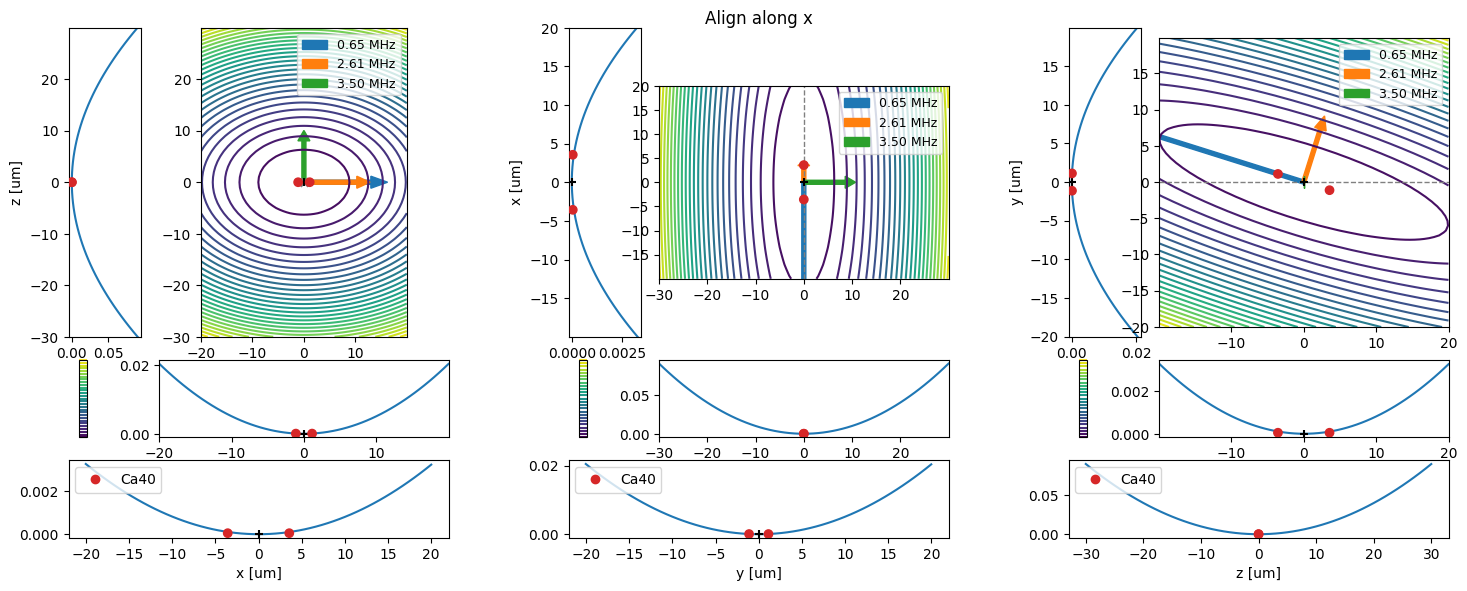

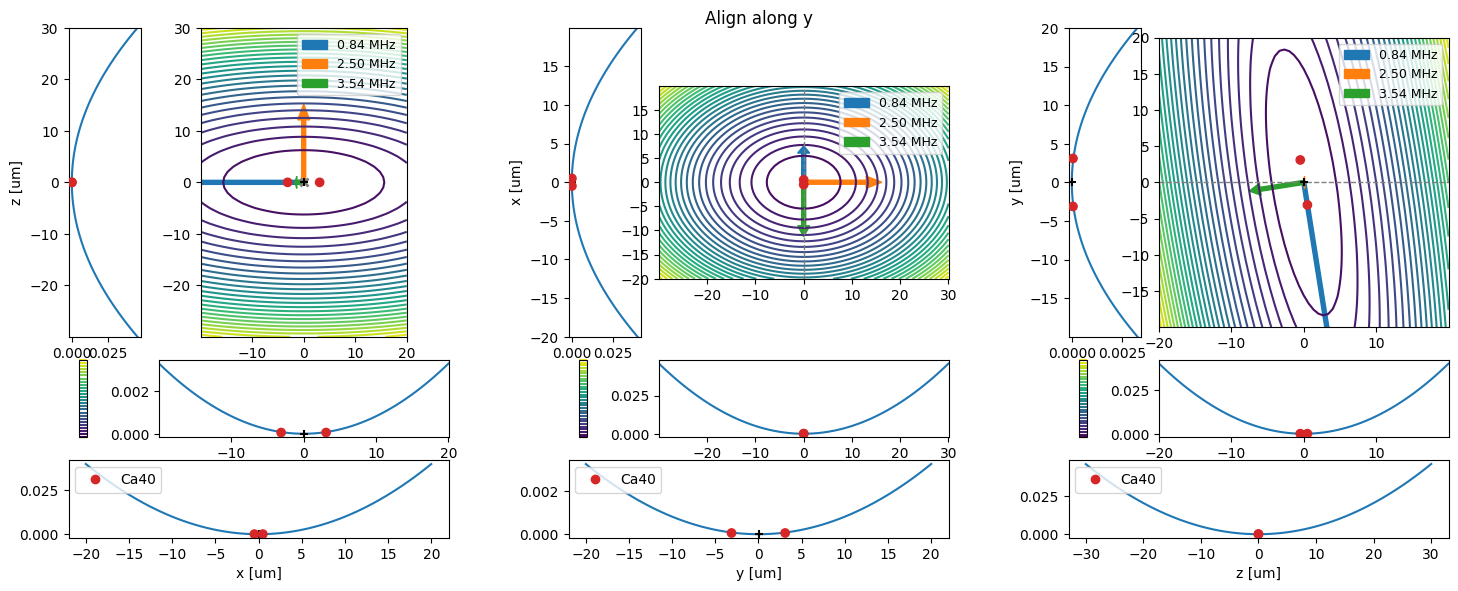

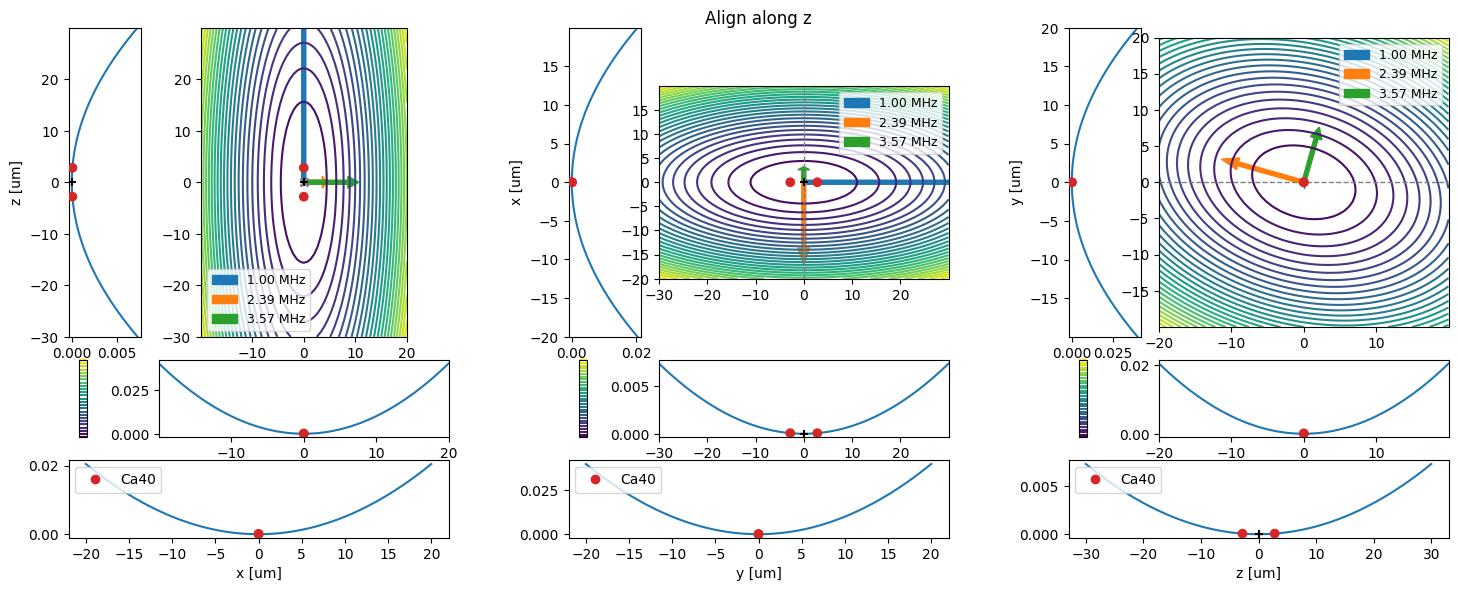

In [5]:

roi = (20e-6, 20e-6, 30e-6)

freqs = np.asarray([1, 2.5, 3.5]) * 1e6
_ax = 'xyz'

for k in range(3):
    
    r0 = np.random.randn(3) * 1e-8
    ff = np.roll(freqs, k)
    title = f"Align along {_ax[k]}"
    print(title)

    htrap = HarmonicTrap(*ff, ion=Ca40, tilt_xy=3e7)
    res = analyse_potential(htrap, None, ions=[Ca40] * 2, r0=r0, verbose=False, roi=roi, plot=False, title=title)
    # res
    _plot_kw = dict(voltages=None, ion=Ca40, r0=r0, roi=roi, pseudo=True, analyse_results=res)

    fig, axes = pp.plot_potential_make_layout(n=3)
    for j, x in enumerate('xyz'):
        pp.plot_potential(htrap, trap_axis=x, axes=axes[j], **_plot_kw)
    fig.suptitle(title)